In [1]:
from skimage import io, filters
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray

from mpl_toolkits import mplot3d

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
image = io.imread('../images/plastic_dark_background.jpg')
image = io.imread('../images/sp5.png')

grayscale = rgb2gray(image)

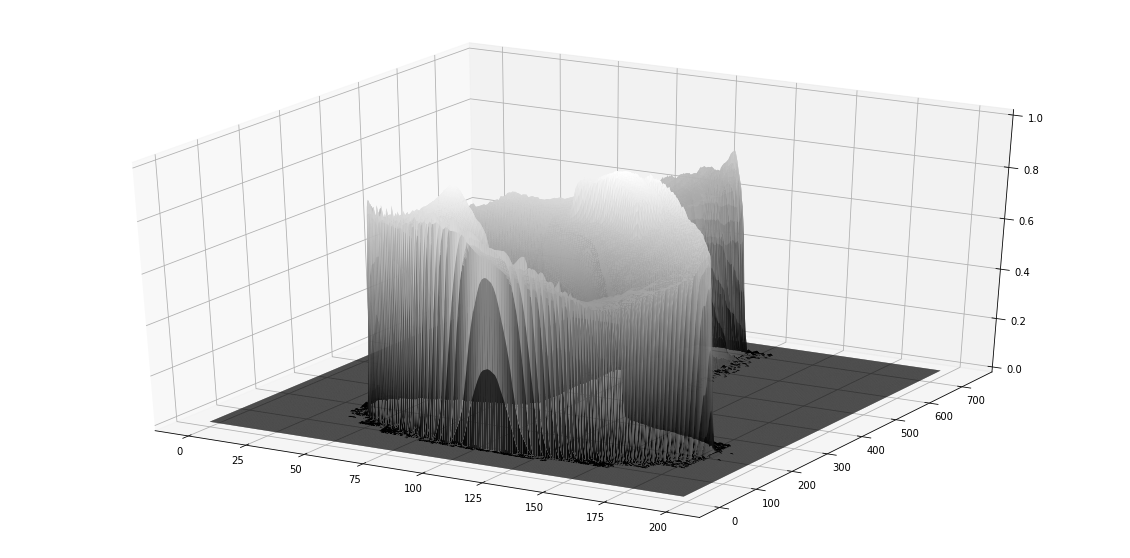

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# generate some sample data

# downscaling has a "smoothing" effect
#lena = scipy.misc.imresize(lena, 0.15, interp='cubic')

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:grayscale.shape[0], 0:grayscale.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, grayscale ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()

In [15]:
from collections import deque

In [25]:
def find_lightest_area_value(grayscale, area_size):
    #print(area_size)
    threshold = 0.01
    pixel_count = 0
    while pixel_count < area_size:
        filtered = np.zeros(grayscale.shape, dtype=np.int8)
        count = 0
        for y, y_val in enumerate(grayscale):
            for x, x_val in enumerate(y_val):
                if x_val > max_value - threshold:
                    count += 1
                    filtered[y,x] = 1

        for y, y_val in enumerate(filtered):
            for x, x_val in enumerate(y_val):
                if x_val == 1:
                    start = (y, x)
                    visited = np.zeros(grayscale.shape, dtype=np.int8)
                    search_queue = deque()
                    search_queue.append(start)
                    visited[start] = 1
                    pixel_count = 1

                    while search_queue:
                        popped = search_queue.popleft()
                        up = (popped[0] + 1, popped[1])
                        down = (popped[0] - 1, popped[1])
                        left = (popped[0], popped[1] - 1)
                        right = (popped[0], popped[1] + 1)
                        for neighbor in [up, down, left, right]:
                            if filtered[neighbor] == 1 and visited[neighbor] == 0:
                                pixel_count += 1
                                visited[neighbor] = 1
                                search_queue.append(neighbor)
                                filtered[neighbor] = 0
                    #print(pixel_count)
                    if pixel_count >= area_size:
                        break
            if pixel_count >= area_size:
                break
        threshold += 0.001

    #print("final pixel count", pixel_count)
    value_sum = 0
    value_count = 0
    for y, y_val in enumerate(grayscale):
        for x, x_val in enumerate(y_val):
            if visited[y][x] == 1:
                value_count += 1
                value_sum += grayscale[y][x]
    print("value count", value_count)
    return value_sum/value_count

In [26]:
output = np.zeros(len(area_sizes), dtype=np.float)

In [27]:
output.shape

(19,)

In [28]:
area_sizes = list(range(10, 200, 10))

In [ ]:
for x, area_size in enumerate(area_sizes):
    
    output[x] = find_lightest_area_value(grayscale, area_size)

value count 59
value count 59
value count 59
value count 59
value count 59
value count 91
value count 91
value count 91
value count 91
value count 116
value count 116
value count 136
value count 136
value count 163


In [ ]:
print(output)

In [ ]:
plt.plot(area_sizes, output)

In [ ]:

image = io.imread('../images/sp3.png')
grayscale = rgb2gray(image)

In [ ]:
def model_results(filename):
    image = io.imread(filename)
    grayscale = rgb2gray(image)
    area_sizes = list(range(10, 300, 5))
    output = np.zeros(len(area_sizes), dtype=np.float)
    
    for x, area_size in enumerate(area_sizes):
        output[x] = find_lightest_area_value(grayscale, area_size)
    plt.plot(area_sizes, output)

In [ ]:
model_results('../images/sp3.png')